In [2]:
# importacion de librerias posibles a utilizar
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics


In [85]:
# visualizamos el set de test provisto

htest=pd.read_csv("hospitalizaciones_test.csv")
htest.head()

,Available Extra Rooms in Hospital,Department,Ward_Facility_Code,doctor_name,staff_available,patientid,Age,gender,Type of Admission,Severity of Illness,health_conditions,Visitors with Patient,Insurance,Admission_Deposit
0,3,gynecology,F,Dr Olivia,10,2858,21-30,Female,Trauma,Moderate,Other,2,No,4749.640225
1,2,TB & Chest disease,E,Dr John,4,65657,51-60,Female,Trauma,Moderate,Asthama,2,Yes,4122.261324
2,2,radiotherapy,E,Dr John,7,45598,51-60,Other,Trauma,Moderate,None,3,No,5459.067882
3,2,gynecology,F,Dr Olivia,1,31132,21-30,Female,Trauma,Moderate,None,2,Yes,3987.033318
4,2,anesthesia,A,Dr John,7,125021,51-60,Female,Trauma,Extreme,Diabetes,2,No,4770.789695


In [86]:
# vemos la cantidad de filas y columnas

htest.shape

(90000, 14)

In [4]:
#visualizamos el set de entrenamiento

htrain=pd.read_csv("hospitalizaciones_train.csv")
htrain.head()

,Available Extra Rooms in Hospital,Department,Ward_Facility_Code,doctor_name,staff_available,patientid,Age,gender,Type of Admission,Severity of Illness,health_conditions,Visitors with Patient,Insurance,Admission_Deposit,Stay (in days)
0,4,gynecology,D,Dr Sophia,0,33070,41-50,Female,Trauma,Extreme,Diabetes,4,Yes,2966.408696,8
1,4,gynecology,B,Dr Sophia,2,34808,31-40,Female,Trauma,Minor,Heart disease,2,No,3554.835677,9
2,2,gynecology,B,Dr Sophia,8,44577,21-30,Female,Trauma,Extreme,Diabetes,2,Yes,5624.733654,7
3,4,gynecology,D,Dr Olivia,7,3695,31-40,Female,Urgent,Moderate,None,4,No,4814.149231,8
4,2,anesthesia,E,Dr Mark,10,108956,71-80,Male,Trauma,Moderate,Diabetes,2,No,5169.269637,34


In [47]:
# vemos cantidad de filas y columnas

htrain.shape

(410000, 15)

In [5]:
# vemos una matriz de correlacion sin tocar datos, este analisis toma x defecto columnas numericas, no categoricas
# segun el sentido comun, las columnas que analiza las distintas correlaciones no tienen alguna vinculacion con el objetivo que se pretende resolver

hosp = htrain.corr()

hosp

C:\Users\Pablo\AppData\Local\Temp\ipykernel_10276\12844998.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  hosp = htrain.corr()


,Available Extra Rooms in Hospital,staff_available,patientid,Visitors with Patient,Admission_Deposit,Stay (in days)
Available Extra Rooms in Hospital,1.000000,-0.003064,-0.005426,0.071073,-0.050775,-0.019383
staff_available,-0.003064,1.000000,-0.000350,0.001444,0.000816,0.006673
patientid,-0.005426,-0.000350,1.000000,-0.006393,0.011602,0.005567
Visitors with Patient,0.071073,0.001444,-0.006393,1.000000,-0.069566,0.027284
Admission_Deposit,-0.050775,0.000816,0.011602,-0.069566,1.000000,0.043899
Stay (in days),-0.019383,0.006673,0.005567,0.027284,0.043899,1.000000


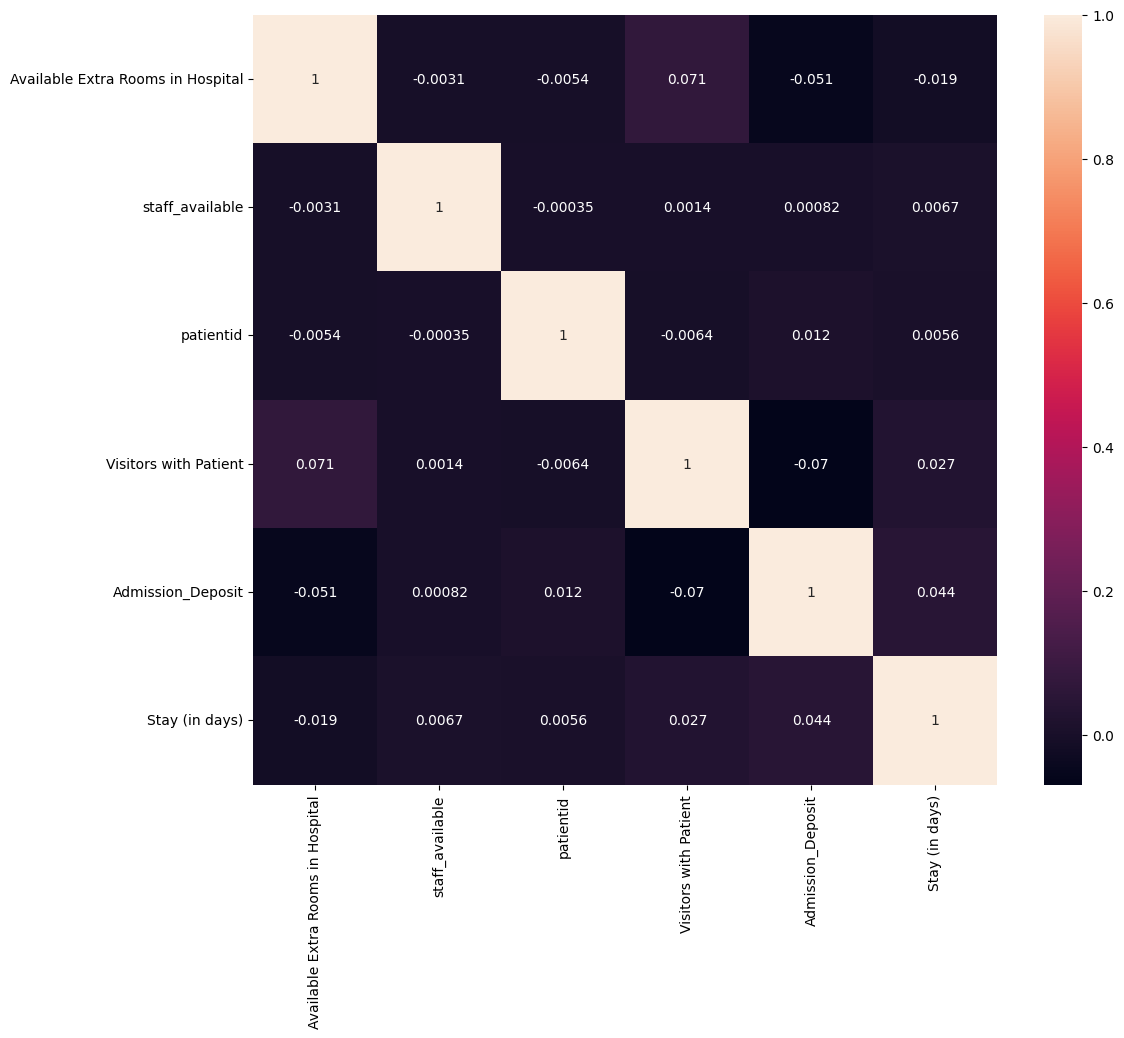

In [6]:
# aca vemos la matriz de correlaciones con colores

fig, ax = plt.subplots(figsize=(12, 10))

sns.heatmap(hosp, annot=True);

In [7]:
# procedemos a eliminar las columnas q considero q no sirven para el problema a resolver

htrain.drop(["Ward_Facility_Code","patientid","doctor_name","staff_available","Available Extra Rooms in Hospital","Visitors with Patient","Admission_Deposit"],axis=1,inplace=True)


In [8]:
#visualizamos como va quedando el set

htrain.head()

,Department,Age,gender,Type of Admission,Severity of Illness,health_conditions,Insurance,Stay (in days)
0,gynecology,41-50,Female,Trauma,Extreme,Diabetes,Yes,8
1,gynecology,31-40,Female,Trauma,Minor,Heart disease,No,9
2,gynecology,21-30,Female,Trauma,Extreme,Diabetes,Yes,7
3,gynecology,31-40,Female,Urgent,Moderate,None,No,8
4,anesthesia,71-80,Male,Trauma,Moderate,Diabetes,No,34


In [9]:
# aca creamos una columna nueva en el set de entrenamiento basada en la columna de cantidad de dias de estadia, se llenara con 1 para valores mayores a 8 y 0 para valores menores a 9

htrain['E.P.'] = [1 if e>8 else 0 for e in htrain['Stay (in days)']]

In [10]:
# visualizamos nuevamente

htrain.head()

,Department,Age,gender,Type of Admission,Severity of Illness,health_conditions,Insurance,Stay (in days),E.P.
0,gynecology,41-50,Female,Trauma,Extreme,Diabetes,Yes,8,0
1,gynecology,31-40,Female,Trauma,Minor,Heart disease,No,9,1
2,gynecology,21-30,Female,Trauma,Extreme,Diabetes,Yes,7,0
3,gynecology,31-40,Female,Urgent,Moderate,None,No,8,0
4,anesthesia,71-80,Male,Trauma,Moderate,Diabetes,No,34,1


In [54]:
# ahora lo que hay q hacer es transformar las columnas categoricas en numericas segun la cantidad de valores unicos de cada columna, 
# por ej. en la columna departamentos hay 5 valores unicos, lo cual hay q pasar cada valor a una columna. Con esto podremos analizar correlaciones
# mas especificas de acuerdo al objetivo a resolver.

htrain["Department"].value_counts()

gynecology            281625
radiotherapy           69132
anesthesia             36250
TB & Chest disease     18825
surgery                 4168
Name: Department, dtype: int64

In [11]:
# para pasar los valores unicos a columnas utilizamos la funcion get_dummies

htrain = pd.get_dummies(htrain, columns=['Department'])

# observamos el set

htrain.head()

,Age,gender,Type of Admission,Severity of Illness,health_conditions,Insurance,Stay (in days),E.P.,Department_TB & Chest disease,Department_anesthesia,Department_gynecology,Department_radiotherapy,Department_surgery
0,41-50,Female,Trauma,Extreme,Diabetes,Yes,8,0,0,0,1,0,0
1,31-40,Female,Trauma,Minor,Heart disease,No,9,1,0,0,1,0,0
2,21-30,Female,Trauma,Extreme,Diabetes,Yes,7,0,0,0,1,0,0
3,31-40,Female,Urgent,Moderate,None,No,8,0,0,0,1,0,0
4,71-80,Male,Trauma,Moderate,Diabetes,No,34,1,0,1,0,0,0


In [56]:
# vemos la cantidad de valores unicos

htrain["Severity of Illness"].value_counts()

Moderate    230819
Minor       107897
Extreme      71284
Name: Severity of Illness, dtype: int64

In [12]:
# para pasar los valores unicos a columnas utilizamos la funcion get_dummies

htrain = pd.get_dummies(htrain, columns=['Severity of Illness'])

# observamos el set

htrain.head()

,Age,gender,Type of Admission,health_conditions,Insurance,Stay (in days),E.P.,Department_TB & Chest disease,Department_anesthesia,Department_gynecology,Department_radiotherapy,Department_surgery,Severity of Illness_Extreme,Severity of Illness_Minor,Severity of Illness_Moderate
0,41-50,Female,Trauma,Diabetes,Yes,8,0,0,0,1,0,0,1,0,0
1,31-40,Female,Trauma,Heart disease,No,9,1,0,0,1,0,0,0,1,0
2,21-30,Female,Trauma,Diabetes,Yes,7,0,0,0,1,0,0,1,0,0
3,31-40,Female,Urgent,None,No,8,0,0,0,1,0,0,0,0,1
4,71-80,Male,Trauma,Diabetes,No,34,1,0,1,0,0,0,0,0,1


In [57]:
# vemos la cantidad de valores unicos

htrain["health_conditions"].value_counts()

None                   137202
Other                   78335
High Blood Pressure     64089
Diabetes                58689
Asthama                 50428
Heart disease           21257
Name: health_conditions, dtype: int64

In [13]:
# para pasar los valores unicos a columnas utilizamos la funcion get_dummies

htrain = pd.get_dummies(htrain, columns=['health_conditions'])

# observamos el set

htrain.head()

,Age,gender,Type of Admission,Insurance,Stay (in days),E.P.,Department_TB & Chest disease,Department_anesthesia,Department_gynecology,Department_radiotherapy,Department_surgery,Severity of Illness_Extreme,Severity of Illness_Minor,Severity of Illness_Moderate,health_conditions_Asthama,health_conditions_Diabetes,health_conditions_Heart disease,health_conditions_High Blood Pressure,health_conditions_None,health_conditions_Other
0,41-50,Female,Trauma,Yes,8,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0
1,31-40,Female,Trauma,No,9,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0
2,21-30,Female,Trauma,Yes,7,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0
3,31-40,Female,Urgent,No,8,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
4,71-80,Male,Trauma,No,34,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0


In [14]:
# para pasar los valores unicos a columnas utilizamos la funcion get_dummies

htrain = pd.get_dummies(htrain, columns=['Age'])

# observamos el set

htrain.head()

,gender,Type of Admission,Insurance,Stay (in days),E.P.,Department_TB & Chest disease,Department_anesthesia,Department_gynecology,Department_radiotherapy,Department_surgery,...,Age_0-10,Age_11-20,Age_21-30,Age_31-40,Age_41-50,Age_51-60,Age_61-70,Age_71-80,Age_81-90,Age_91-100
0,Female,Trauma,Yes,8,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
1,Female,Trauma,No,9,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
2,Female,Trauma,Yes,7,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
3,Female,Urgent,No,8,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
4,Male,Trauma,No,34,1,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [15]:
# para pasar los valores unicos a columnas utilizamos la funcion get_dummies

htrain = pd.get_dummies(htrain, columns=['gender'])

# observamos el set

htrain.head()

,Type of Admission,Insurance,Stay (in days),E.P.,Department_TB & Chest disease,Department_anesthesia,Department_gynecology,Department_radiotherapy,Department_surgery,Severity of Illness_Extreme,...,Age_31-40,Age_41-50,Age_51-60,Age_61-70,Age_71-80,Age_81-90,Age_91-100,gender_Female,gender_Male,gender_Other
0,Trauma,Yes,8,0,0,0,1,0,0,1,...,0,1,0,0,0,0,0,1,0,0
1,Trauma,No,9,1,0,0,1,0,0,0,...,1,0,0,0,0,0,0,1,0,0
2,Trauma,Yes,7,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3,Urgent,No,8,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,1,0,0
4,Trauma,No,34,1,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [16]:
# para pasar los valores unicos a columnas utilizamos la funcion get_dummies

htrain = pd.get_dummies(htrain, columns=['Type of Admission'])

# observamos el set

htrain.head()

,Insurance,Stay (in days),E.P.,Department_TB & Chest disease,Department_anesthesia,Department_gynecology,Department_radiotherapy,Department_surgery,Severity of Illness_Extreme,Severity of Illness_Minor,...,Age_61-70,Age_71-80,Age_81-90,Age_91-100,gender_Female,gender_Male,gender_Other,Type of Admission_Emergency,Type of Admission_Trauma,Type of Admission_Urgent
0,Yes,8,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
1,No,9,1,0,0,1,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0
2,Yes,7,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
3,No,8,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
4,No,34,1,0,1,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0


In [17]:
# para pasar los valores unicos a columnas utilizamos la funcion get_dummies

htrain = pd.get_dummies(htrain, columns=['Insurance'])

# observamos el set

htrain.head()

,Stay (in days),E.P.,Department_TB & Chest disease,Department_anesthesia,Department_gynecology,Department_radiotherapy,Department_surgery,Severity of Illness_Extreme,Severity of Illness_Minor,Severity of Illness_Moderate,...,Age_81-90,Age_91-100,gender_Female,gender_Male,gender_Other,Type of Admission_Emergency,Type of Admission_Trauma,Type of Admission_Urgent,Insurance_No,Insurance_Yes
0,8,0,0,0,1,0,0,1,0,0,...,0,0,1,0,0,0,1,0,0,1
1,9,1,0,0,1,0,0,0,1,0,...,0,0,1,0,0,0,1,0,1,0
2,7,0,0,0,1,0,0,1,0,0,...,0,0,1,0,0,0,1,0,0,1
3,8,0,0,0,1,0,0,0,0,1,...,0,0,1,0,0,0,0,1,1,0
4,34,1,0,1,0,0,0,0,0,1,...,0,0,0,1,0,0,1,0,1,0


In [65]:
# vemos la cantidad de columnas nuevas

htrain.shape

(410000, 34)

In [66]:
# verificamos posibles nulos, en este caso no hay

htrain[htrain.isnull().any(axis=1)].count()

Stay (in days)                           0
E.P.                                     0
Department_TB & Chest disease            0
Department_anesthesia                    0
Department_gynecology                    0
Department_radiotherapy                  0
Department_surgery                       0
Severity of Illness_Extreme              0
Severity of Illness_Minor                0
Severity of Illness_Moderate             0
health_conditions_Asthama                0
health_conditions_Diabetes               0
health_conditions_Heart disease          0
health_conditions_High Blood Pressure    0
health_conditions_None                   0
health_conditions_Other                  0
Age_0-10                                 0
Age_11-20                                0
Age_21-30                                0
Age_31-40                                0
Age_41-50                                0
Age_51-60                                0
Age_61-70                                0
Age_71-80  

In [18]:
# vemos la nueva matriz de correlaciones

hosp1 = htrain.corr()

hosp1

,Stay (in days),E.P.,Department_TB & Chest disease,Department_anesthesia,Department_gynecology,Department_radiotherapy,Department_surgery,Severity of Illness_Extreme,Severity of Illness_Minor,Severity of Illness_Moderate,...,Age_81-90,Age_91-100,gender_Female,gender_Male,gender_Other,Type of Admission_Emergency,Type of Admission_Trauma,Type of Admission_Urgent,Insurance_No,Insurance_Yes
Stay (in days),1.000000,0.493378,0.241790,0.596150,-0.701218,0.218441,0.234838,0.015850,-0.069534,0.049619,...,0.225486,0.103342,-0.629616,0.560633,0.219943,-0.048191,0.044596,-0.000639,0.000947,-0.000947
E.P.,0.493378,1.000000,0.154842,0.242282,-0.230424,-0.005953,0.078740,0.004707,-0.037693,0.029866,...,0.100105,0.041025,-0.206991,0.184325,0.072283,-0.012470,0.015249,-0.005982,0.001063,-0.001063
Department_TB & Chest disease,0.241790,0.154842,1.000000,-0.068320,-0.324921,-0.098794,-0.022232,0.006611,-0.010984,0.004699,...,0.029587,0.108315,-0.292459,0.260405,0.102186,-0.035622,0.024783,0.012360,-0.002240,0.002240
Department_anesthesia,0.596150,0.242282,-0.068320,1.000000,-0.461274,-0.140252,-0.031561,0.014155,-0.040028,0.024720,...,0.040626,0.034711,-0.414714,0.369954,0.143484,-0.058274,0.055576,-0.003358,0.000254,-0.000254
Department_gynecology,-0.701218,-0.230424,-0.324921,-0.461274,1.000000,-0.667025,-0.150102,-0.008677,0.078188,-0.062783,...,-0.190587,-0.078106,0.899648,-0.800042,-0.316399,0.035593,-0.017885,-0.023138,0.002025,-0.002025
Department_radiotherapy,0.218441,-0.005953,-0.098794,-0.140252,-0.667025,1.000000,-0.045639,-0.014000,-0.050535,0.055560,...,0.164221,0.010193,-0.600661,0.533098,0.213416,0.026343,-0.043078,0.029678,-0.001908,0.001908
Department_surgery,0.234838,0.078740,-0.022232,-0.031561,-0.150102,-0.045639,1.000000,0.038515,-0.036656,0.003114,...,0.091455,-0.001183,-0.133363,0.118597,0.046904,-0.023626,0.034474,-0.020091,0.001715,-0.001715
Severity of Illness_Extreme,0.015850,0.004707,0.006611,0.014155,-0.008677,-0.014000,0.038515,1.000000,-0.274161,-0.520676,...,-0.003918,-0.003510,-0.006896,0.002638,0.009578,-0.119563,0.121330,-0.018341,0.002767,-0.002767
Severity of Illness_Minor,-0.069534,-0.037693,-0.010984,-0.040028,0.078188,-0.050535,-0.036656,-0.274161,1.000000,-0.678292,...,-0.030035,0.009878,0.071142,-0.063730,-0.024069,0.060984,-0.093643,0.059164,-0.001419,0.001419
Severity of Illness_Moderate,0.049619,0.029866,0.004699,0.024720,-0.062783,0.055560,0.003114,-0.520676,-0.678292,1.000000,...,0.029658,-0.006087,-0.057889,0.054562,0.014050,0.037215,-0.009571,-0.038510,-0.000854,0.000854


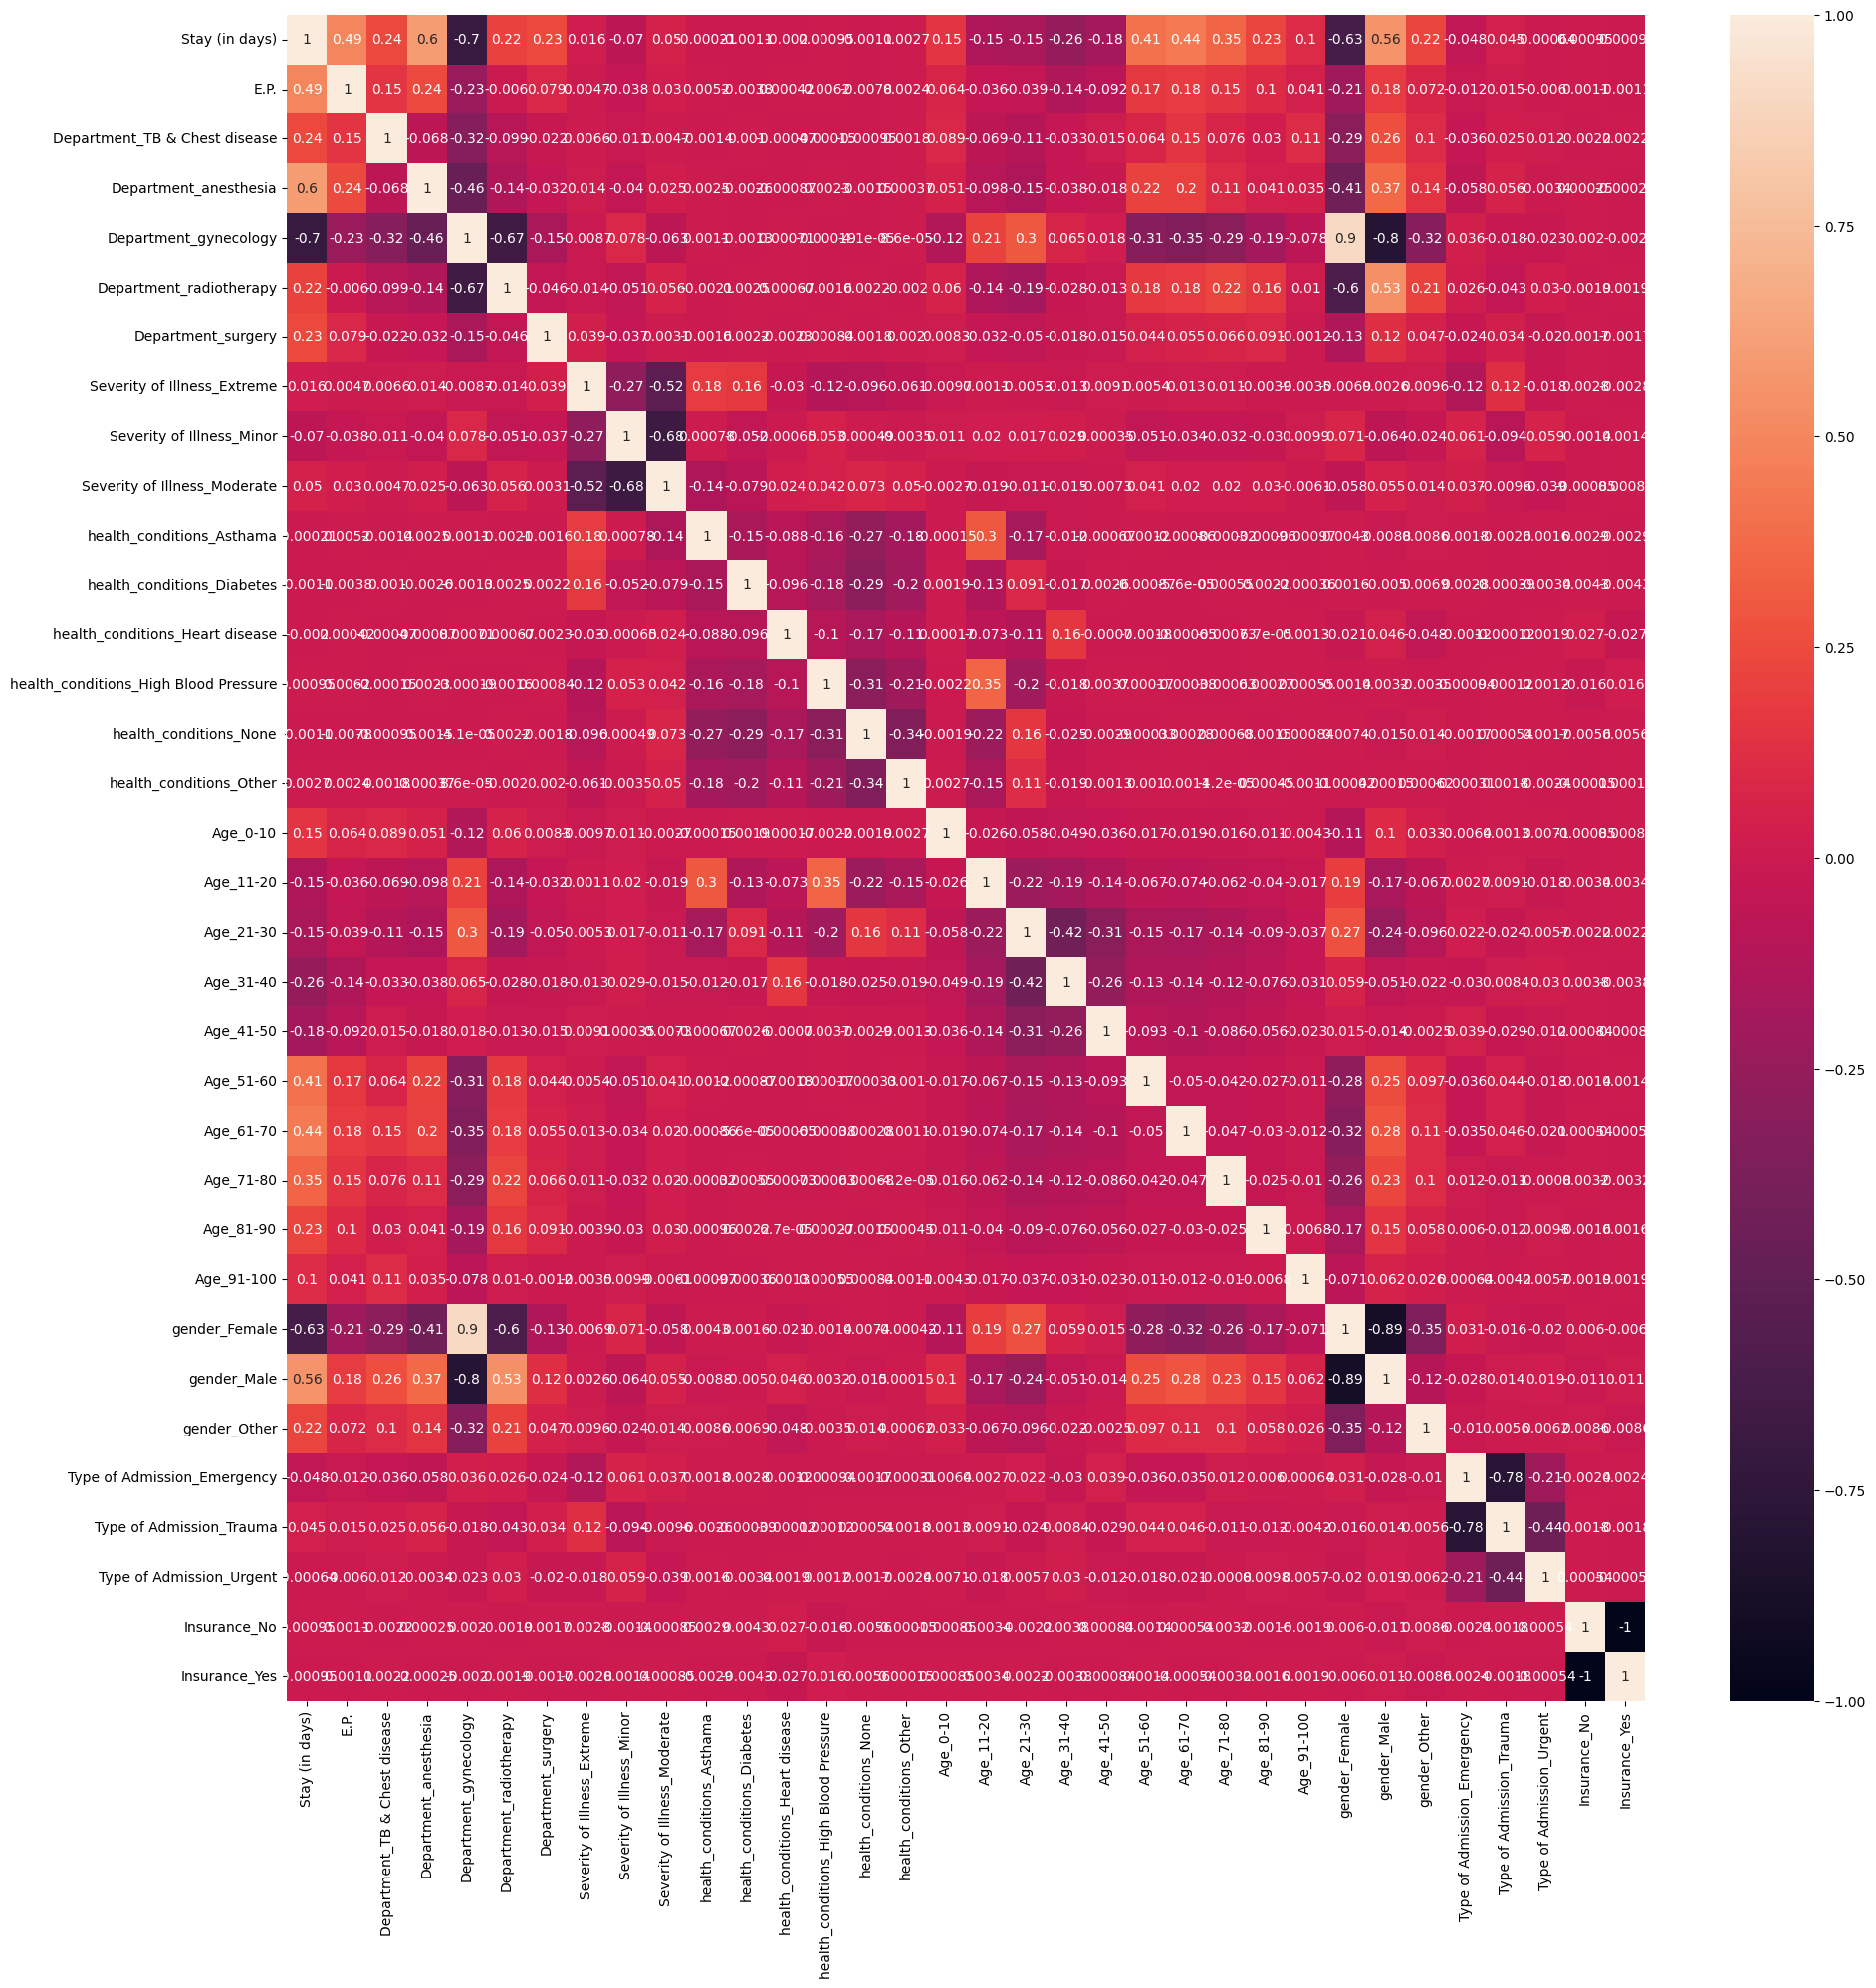

In [19]:
# visualizamos la matriz anterior con colores

fig, ax = plt.subplots(figsize=(22,22))

sns.heatmap(hosp1, annot=True);

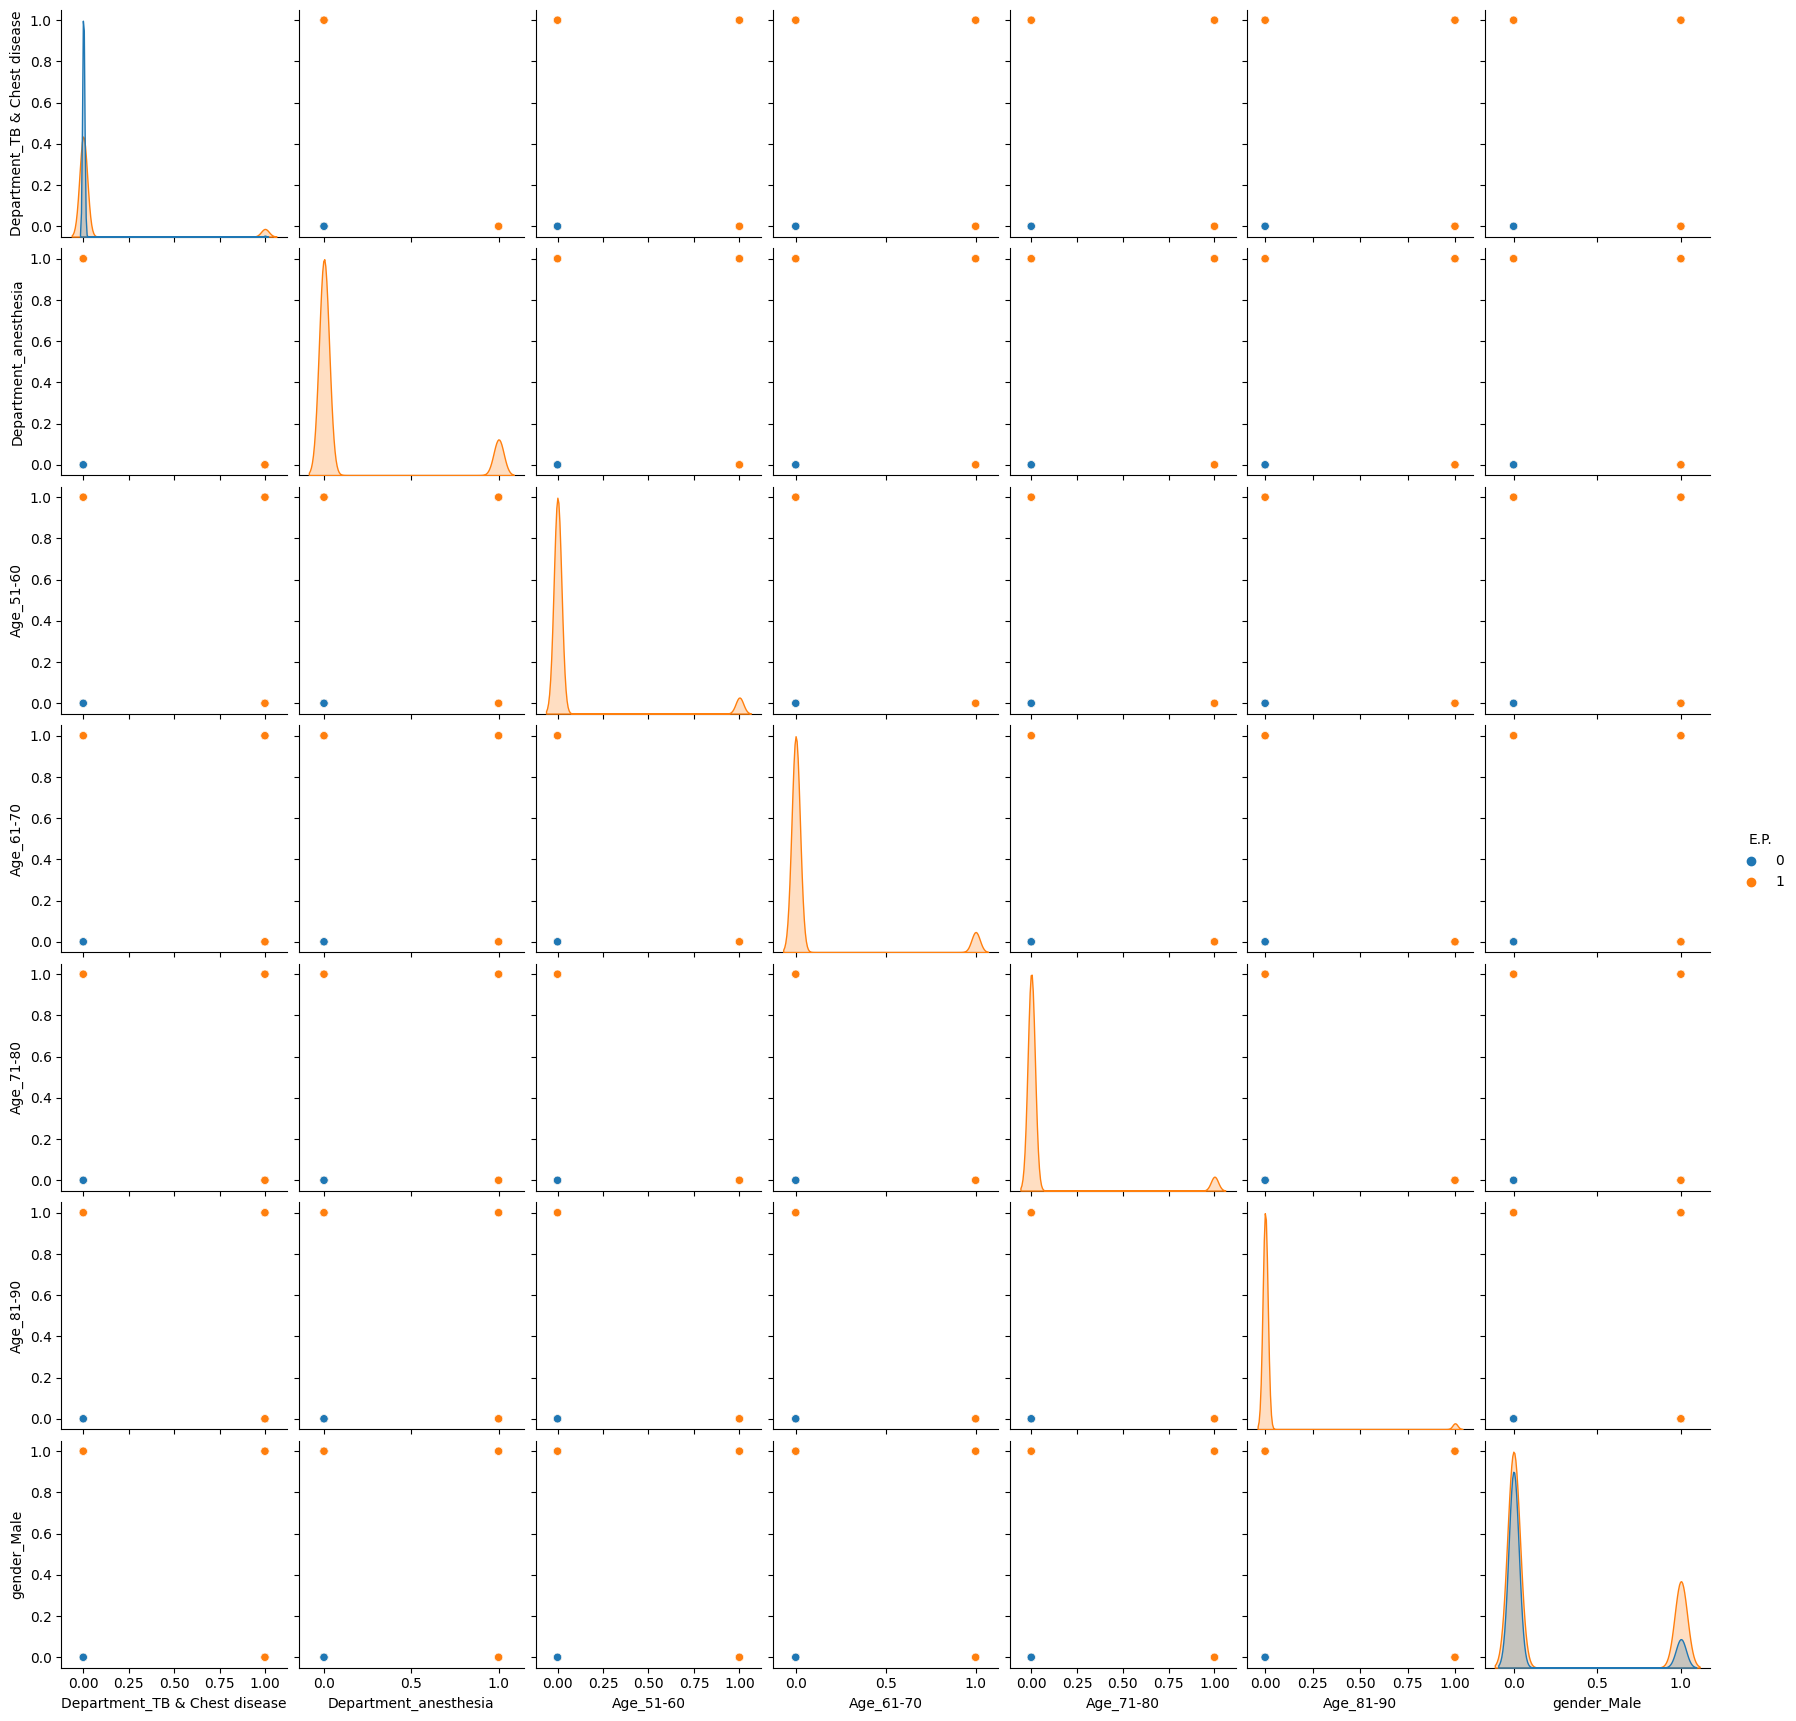

In [30]:
# visualizacion de relaciones entre variables de acuerdo a columnas especificas que a criterio personal tienen mas correlacion con el problema a resolver

colrel=["Department_TB & Chest disease","Department_anesthesia","Age_51-60","Age_61-70","Age_71-80","Age_81-90","gender_Male","E.P."]
dfcolrel=htrain[colrel]
sns.pairplot(dfcolrel, hue = 'E.P.')
plt.show()

In [31]:
# se puede apreciar con el pairplot q al menos no siguen relaciones lineales, x lo tanto aplicar un modelo de regresion logistica no seria conveniente en ppio.
# el proyecto propone resolver un problema del tipo clasificacion, es decir si se pertenece a una categoria o a otra. 

In [39]:
#elijo columnas q considero q poseen mayor correlacion para el entrenamiento (variables predictoras X) y la variable a predecir y

coltrain=["Department_TB & Chest disease","Department_anesthesia","Age_51-60","Age_61-70","Age_71-80","Age_81-90","gender_Male"]
X=htrain[coltrain]
y=htrain["E.P."]


In [45]:
#separacion de los datos en "train" y "test"

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [46]:
# verificamos que coincidan la cantidad de filas de los datos de entrenamiento

X_train.shape, y_train.shape

((307500, 7), (307500,))

In [47]:
# verificamos que coincidan la cantidad de filas de los datos de test

X_test.shape, y_test.shape

((102500, 7), (102500,))

In [94]:
# modelo clásico de clasificación: `árbol de decisión` 

from sklearn.tree import DecisionTreeClassifier

# Instanciamos un objeto de la clase DecisionTreeClassifier

clf = DecisionTreeClassifier(max_depth = 7, random_state = 42) 

# Entrenamos el modelo

clf.fit(X_train,y_train)

# Predecimos sobre nuestro set de entrenamiento

y_train_pred = clf.predict(X_train)

# Predecimos sobre nuestro set de test

y_test_pred = clf.predict(X_test)

# Importamos una métrica utilizada para evaluar modelos de clasificación. 

from sklearn.metrics import accuracy_score

# Comparamos con las etiquetas reales

print('Accuracy sobre conjunto de Train:', accuracy_score(y_train_pred,y_train))
print('Accuracy sobre conjunto de Test:', accuracy_score(y_test_pred,y_test))


Accuracy sobre conjunto de Train: 0.6481918699186991
Accuracy sobre conjunto de Test: 0.6464292682926829


In [66]:
# Introduccion Matriz de confusion

# visualizamos en un DF los datos que el modelo utilizo para el testeo como asi tambien los datos resultantes de las predicciones

pred_results = pd.DataFrame({'y_test': y_test,
                             'y_pred': y_test_pred})
pred_results.head()

,y_test,y_pred
258473,1,1
403774,1,1
366961,1,1
9745,0,1
22246,0,1


In [88]:
# utilizamos la funcion crosstab de forma alternativa para visualizar la matriz de confusion

mconf = pd.crosstab(pred_results.y_pred, pred_results.y_test)

mconf

y_test,0,1
y_pred,,
0,4784,2211
1,34030,61475


In [89]:
# declaramos cada cuadrante de la matriz de confusion de acuerdo a True Positive (TP), False Negative (FN), False Positive (FP) y True Negative (TN).
# en otras palabras, TP es la cantidad de casos positivos (es decir en este problema se interepreta como la cantidad de casos en el que la estadia de un paciente es mayor a 8 dias) que el modelo pudo detectar correctamente,
# TN es la cantidad de casos negativos (es decir una estadia menor a 9 dias) que se predijeron correctamente, FP es la cantidad de casos que el modelo predijo como
# positivos (es decir con estadia mayor a 8 dias) pero su clasificacion es la contraria, es decir casos con estadias menores a 9 dias. Y por ultimo, FN es la cantidad
# de casos negativos que el modelo detecto (es decir estadias cortas) pero su verdadera clasificacion es positiva, es decir estadia larga.

TP = mconf[1][1]
TN = mconf[0][0]
FP = mconf[0][1]
FN = mconf[1][0]

In [90]:
# de acuerdo a lo declarado es que podemos calcular distintas metricas para evaluar la efectividad del modelo
# la primer metrica es la exactitud del modelo, mide el porcentaje de casos que el modelo ha acertado
# 

accuracy_score_verified = (TP + TN) / (TP + FP + TN + FN)

accuracy_score_verified

0.6464292682926829

In [91]:
# la segunda metrica es la precision del modelo, podemos medir la calidad del modelo de machine learning en tareas de clasificación. 
# ¿qué porcentaje de los que hemos dicho que son la clase positiva, en realidad lo son?

precision_score_survived = TP / (TP + FP)

precision_score_survived

0.643683576776085

In [92]:
# y la tercer metrica es la exhaustividad del modelo, nos va a informar sobre la cantidad que el modelo es capaz de identificar
# ¿qué porcentaje de la clase positiva hemos sido capaces de identificar? 

recall_score_survived = TP / (TP + FN)

recall_score_survived

0.9652827937066231

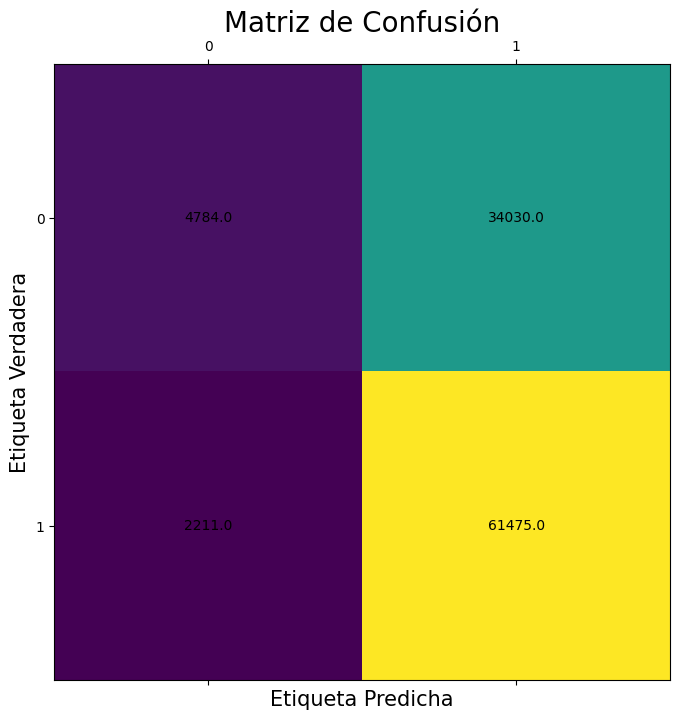

In [72]:
# aca ploteamos la matriz de confusion con colores

from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test, y_test_pred)

fig, ax = plt.subplots(figsize=(12,8))
ax.matshow(cm)
plt.title('Matriz de Confusión', fontsize=20)
plt.ylabel('Etiqueta Verdadera', fontsize=15)
plt.xlabel('Etiqueta Predicha', fontsize=15)
for (i, j), z in np.ndenumerate(cm):
    ax.text(j, i, '{:0.1f}'.format(z), ha='center', va='center')

In [73]:
# aca vemos un reporte de las distintas metricas

print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.68      0.12      0.21     38814
           1       0.64      0.97      0.77     63686

    accuracy                           0.65    102500
   macro avg       0.66      0.54      0.49    102500
weighted avg       0.66      0.65      0.56    102500



In [74]:
# aca verificamos con las funciones de cada metrica de forma automatica y vemos que coinciden.

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
acc = accuracy_score(y_test, y_test_pred)
prec = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)

print("accuracy_score : ", acc)
print("precision_score : ", prec)
print("recall_score : ", recall)

accuracy_score :  0.6464292682926829
precision_score :  0.643683576776085
recall_score :  0.9652827937066231


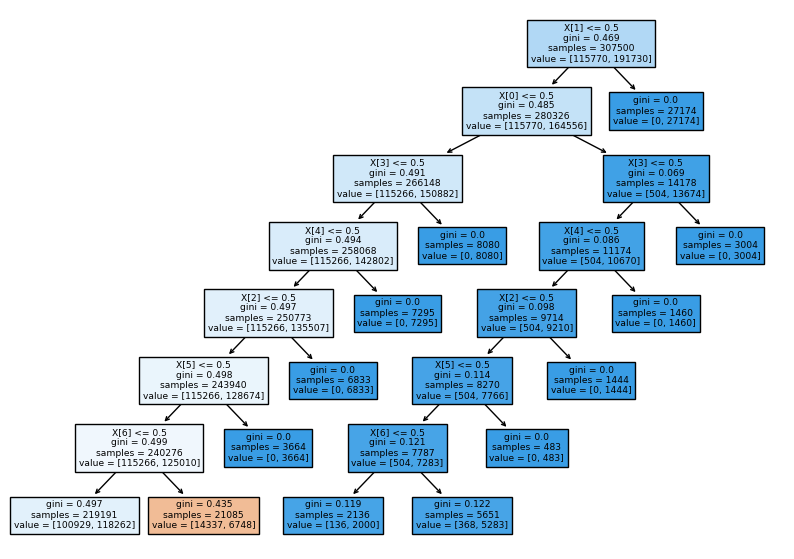

In [75]:
# aca podemos visualizar los distintos niveles del modelo del arbol de decision.

from sklearn import tree

plt.figure(figsize = (10,7))
tree.plot_tree(clf, filled = True)
plt.show()

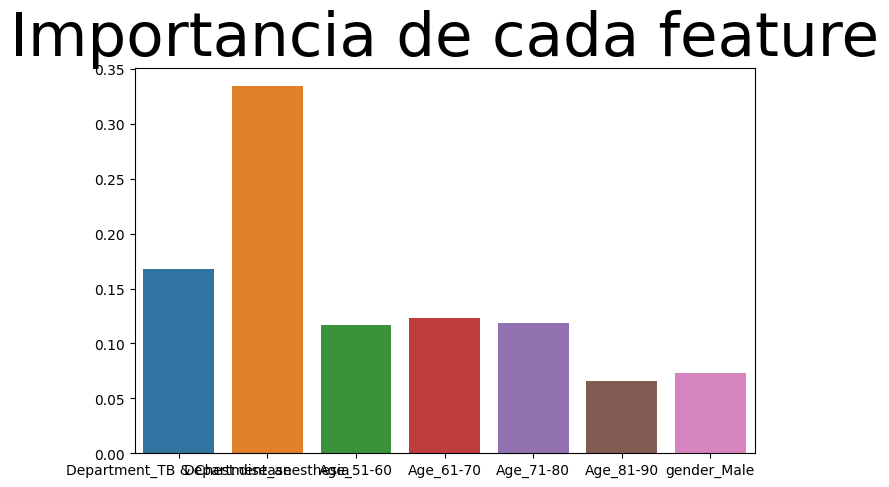

In [50]:
# Ploteamos la importancia de los atributos elegidos a la hora de hacer la predicción


plt.figure(figsize = (8,5))

importances = clf.feature_importances_
columns = X.columns
sns.barplot(x = columns, y = importances)
plt.title('Importancia de cada feature', fontsize = 44)
plt.show()

In [83]:
# Grabar el Modelo
from joblib import dump, load # libreria de serializacion

# grabar el modelo en un archivo
dump(clf, 'DecisionTreeClassifier.joblib')

['DecisionTreeClassifier.joblib']

In [84]:
mi_modelo = load('DecisionTreeClassifier.joblib')
mi_modelo.predict(X_test)

array([1, 1, 1, ..., 1, 0, 1], dtype=int64)

In [81]:
#volvemos el array dataframe
result1= pd.DataFrame(y_test_pred)

#nombramos columna
result1 = result1.rename(columns={0:'pred'})

#exportamos a csv
result1.to_csv('pablocastr.csv', index=False)

In [82]:
result1

,pred
0,1
1,1
2,1
3,1
4,1
...,...
102495,1
102496,1
102497,1
102498,0


In [51]:
# modelos clásicos de clasificación: `vecinos más cercanos`.

from sklearn.neighbors import KNeighborsClassifier

# Instanciamos un objeto de la clase KNeighborsClassifier

clf1 = KNeighborsClassifier(n_neighbors=7)

# Entrenamos el modelo

clf1.fit(X,y)

# Predecimos sobre nuestro set de entrenamiento

y_train_pred = clf1.predict(X_train)

# Predecimos sobre nuestro set de test

y_test_pred = clf1.predict(X_test)


# Importamos una métrica utilizada para evaluar modelos de clasificación. 

from sklearn.metrics import accuracy_score

# Comparamos con las etiquetas reales

print('Accuracy sobre conjunto de Train:', accuracy_score(y_train_pred,y_train))
print('Accuracy sobre conjunto de Test:', accuracy_score(y_test_pred,y_test))


Accuracy sobre conjunto de Train: 0.5918243902439024
Accuracy sobre conjunto de Test: 0.5927707317073171
